In [1]:
import pandas as pd
import numpy as np

#see the data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#play with words
import nltk
import re
from pprint import pprint


import warnings
warnings.filterwarnings("ignore")
import json
import wrangle as w

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import auto_model2a1 as atm

import seaborn as sns
import unicodedata

In [2]:
#save dictionary as a json file
'''import json
data = w.scrape_github_data()
json.dump(data, open("data.json", "w"), indent=1)'''

'import json\ndata = w.scrape_github_data()\njson.dump(data, open("data.json", "w"), indent=1)'

In [3]:
#import json file

data = json.load(open("data.json"))

In [4]:
df = pd.DataFrame(data)   

In [5]:
df.readme_contents = df.readme_contents.str.replace('-',' ')

In [6]:
df.head()


,repo,language,readme_contents
0,/kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...
1,/pretrehr/Sports-betting,Python,[![forthebadge made with python](http://ForThe...
2,/llSourcell/ChatGPT_Sports_Betting_Bot,Jupyter Notebook,# ChatGPT Sports Betting Bot\n\nThis is the co...
3,/georgedouzas/sports-betting,Python,[scikit learn]: <http://scikit learn.org/stabl...
4,/sedemmler/WagerBrain,Python,# WagerBrain\nA package containing the essenti...


In [7]:
df['clean_norm_token'] = df.readme_contents.apply(w.tokenize).apply(w.basic_clean).apply(w.remove_stopwords).apply(w.lemmatize)

In [8]:
df.head()

,repo,language,readme_contents,clean_norm_token
0,/kyleskom/NBA-Machine-Learning-Sports-Betting,Python,# NBA Sports Betting Using Machine Learning 🏀\...,nba sport betting using machine learning img s...
1,/pretrehr/Sports-betting,Python,[![forthebadge made with python](http://ForThe...,forthebadge made python httpforthebadgecomimag...
2,/llSourcell/ChatGPT_Sports_Betting_Bot,Jupyter Notebook,# ChatGPT Sports Betting Bot\n\nThis is the co...,chatgpt sport betting bot code chatgpt sport b...
3,/georgedouzas/sports-betting,Python,[scikit learn]: <http://scikit learn.org/stabl...,scikit learn httpscikit learnorgstable black b...
4,/sedemmler/WagerBrain,Python,# WagerBrain\nA package containing the essenti...,wagerbrain package containing essential math t...


In [9]:
#drop rows with nulls 
df = df.dropna()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 103
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   repo              100 non-null    object
 1   language          100 non-null    object
 2   readme_contents   100 non-null    object
 3   clean_norm_token  100 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [11]:
#in language column replace language with other if it is not in the top 3 languages
top_3 = df.language.value_counts().head(3).index.tolist()
print(top_3)
df.language = df.language.apply(lambda x: x if x in top_3 else 'other')




['JavaScript', 'Python', 'Jupyter Notebook']


In [12]:
#baseline is 43%
df.language.value_counts(normalize=True)

other               0.43
JavaScript          0.24
Python              0.23
Jupyter Notebook    0.10
Name: language, dtype: float64

In [13]:
#calls the split function from wrangle.py
train, validate, test = w.split_function_cat_target(df, "language")

In [14]:
train.head()

,repo,language,readme_contents,clean_norm_token
51,/Cloudbet/docs,JavaScript,[Cloudbet](https://www.cloudbet.com/) API is p...,cloudbet httpswwwcloudbetcom api publicly avai...
103,/denp1/bfjs,JavaScript,bfjs\n====\n\nWhat is it\n==========\n\n**bfjs...,bfjs bfjs javascript bookmarklet adding live c...
68,/incredigroup/cryptobetting_sports,JavaScript,# ESportsRef Website built with Next/Mongo\n\n...,esportsref website built nextmongo mongodb con...
33,/S1M0N38/aao,Python,> :warning: This project is no longer supporte...,warning project longer supported check new ver...
83,/gonzalezlrjesus/API-Betting-Sports,other,# Sports Betting API\n[![Go Reference](https:/...,sport betting api go reference httpspkggodevba...


In [15]:

python_words = w.clean(' '.join(train[train.language=='Python']['clean_norm_token']))
java_script_words = w.clean(' '.join(train[train.language=='JavaScript']['clean_norm_token']))
jupyter_notebook_words = w.clean(' '.join(train[train.language=='Jupyter Notebook']['clean_norm_token']))
other_words = w.clean(' '.join(train[train.language=='other']['clean_norm_token']))

all_words = w.clean(' '.join(df['clean_norm_token']))

In [16]:
python_freq = pd.Series(python_words).value_counts()
java_script_freq = pd.Series(java_script_words).value_counts()
jupyter_notebook_freq = pd.Series(jupyter_notebook_words).value_counts()
other_freq = pd.Series(other_words).value_counts()

all_freq = pd.Series(all_words).value_counts()

In [17]:
def make_ngrams(words, n):
    return pd.Series(nltk.ngrams(words, n)).value_counts().head(20)

In [18]:
def plot_bigrams(words):
    word_data = {k[0] + ' ' + k[1]: v for k, v in words.to_dict().items()}
    
    word_img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_data)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(word_img)
    plt.axis('off')
    plt.show()

In [21]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<AxesSubplot:>

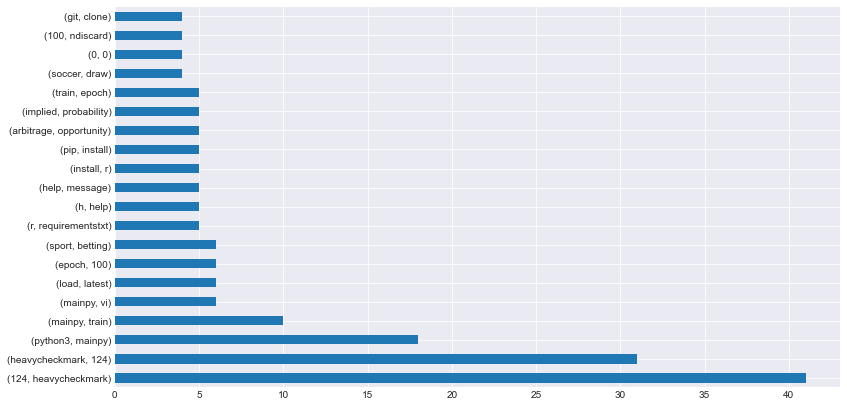

In [22]:
pd.Series(nltk.ngrams(python_words,2)).value_counts().head(20).plot.barh()

In [23]:
blog_img = WordCloud(background_color='white').generate_from_frequencies(python_freq)
plt.imshow(blog_img)
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [ ]:
blog_img = WordCloud(background_color='white').generate_from_frequencies(java_script_freq)
plt.imshow(blog_img)
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [ ]:
#sets the X and y variables for train, validate, and test
X_train = train.clean_norm_token
y_train = train.language
X_validate = validate.clean_norm_token
y_validate = validate.language
X_test = test.clean_norm_token
y_test = test.language

In [ ]:
X_train.head()

51     cloudbet httpswwwcloudbetcom api publicly avai...
103    bfjs bfjs javascript bookmarklet adding live c...
68     esportsref website built nextmongo mongodb con...
33     warning project longer supported check new ver...
83     sport betting api go reference httpspkggodevba...
Name: clean_norm_token, dtype: object

In [ ]:
#make my bag of words Term Frequency 
cv = CountVectorizer()
X_bow = cv.fit_transform(X_train) 
X_validate_bow = cv.transform(X_validate)
X_test_bow = cv.transform(X_test)

In [ ]:
X_validate_bow.shape

(20, 4879)

In [ ]:
#auto runs through knn models with k values 5-20
atm.auto_knn_scores(X_bow, y_train, X_validate_bow, y_validate)

     k  train_accuracy  validate_accuracy     delta
7   12        0.633333               0.30  0.333333
8   13        0.666667               0.40  0.266667
14  19        0.600000               0.35  0.250000
11  16        0.533333               0.35  0.183333
1    6        0.516667               0.35  0.166667
10  15        0.550000               0.40  0.150000
0    5        0.533333               0.40  0.133333
4    9        0.533333               0.40  0.133333
9   14        0.616667               0.50  0.116667
3    8        0.550000               0.45  0.100000
12  17        0.550000               0.45  0.100000
6   11        0.600000               0.50  0.100000
5   10        0.583333               0.50  0.083333
2    7        0.516667               0.45  0.066667
13  18        0.516667               0.45  0.066667


In [ ]:
#auto runs through random forest models with max_depth values 5-20
atm.auto_random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
15         20        1.000000               0.35  0.650000
10         15        0.983333               0.35  0.633333
13         18        0.983333               0.35  0.633333
12         17        0.983333               0.40  0.583333
14         19        0.983333               0.40  0.583333
9          14        0.966667               0.40  0.566667
7          12        0.950000               0.40  0.550000
8          13        0.950000               0.40  0.550000
6          11        0.933333               0.40  0.533333
11         16        0.983333               0.45  0.533333
5          10        0.916667               0.45  0.466667
4           9        0.883333               0.45  0.433333
3           8        0.866667               0.45  0.416667
2           7        0.833333               0.45  0.383333
1           6        0.816667               0.50  0.316667
0           5        0.733333               0.45  0.2833

In [ ]:
#auto runs through decision tree models with the "entropy" parameter with max_depth values 5-20
atm.auto_random_forest_entropy_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
9          14        0.983333               0.40  0.583333
10         15        0.983333               0.40  0.583333
12         17        1.000000               0.45  0.550000
13         18        1.000000               0.45  0.550000
14         19        1.000000               0.45  0.550000
15         20        1.000000               0.45  0.550000
6          11        0.950000               0.40  0.550000
11         16        0.983333               0.45  0.533333
7          12        0.950000               0.45  0.500000
2           7        0.866667               0.40  0.466667
8          13        0.966667               0.50  0.466667
4           9        0.916667               0.45  0.466667
5          10        0.950000               0.50  0.450000
3           8        0.900000               0.50  0.400000
1           6        0.850000               0.45  0.400000
0           5        0.766667               0.45  0.3166

In [ ]:
#auto runs through logistic regression models with C values .1-1
atm.auto_lo_regress_scores(X_bow, y_train, X_validate_bow, y_validate)

   c_range  train_accuracy  validate_accuracy  delta
0      0.1             1.0               0.40   0.60
1      0.2             1.0               0.45   0.55
2      0.3             1.0               0.45   0.55
3      0.4             1.0               0.45   0.55
4      0.5             1.0               0.45   0.55
5      0.6             1.0               0.45   0.55
6      0.7             1.0               0.45   0.55
7      0.8             1.0               0.45   0.55
8      0.9             1.0               0.45   0.55


In [ ]:
#make my bag of words TF-IDF
tfidf = TfidfVectorizer()
X_bow = tfidf.fit_transform(X_train) 
X_validate_bow = tfidf.transform(X_validate)
X_test_bow = tfidf.transform(X_test)

In [ ]:
#auto runs through knn models with k values 5-20
atm.auto_knn_scores(X_bow, y_train, X_validate_bow, y_validate)

     k  train_accuracy  validate_accuracy     delta
13  18        0.550000               0.40  0.150000
9   14        0.483333               0.35  0.133333
10  15        0.533333               0.40  0.133333
14  19        0.533333               0.40  0.133333
7   12        0.483333               0.40  0.083333
12  17        0.516667               0.45  0.066667
0    5        0.566667               0.50  0.066667
6   11        0.466667               0.40  0.066667
1    6        0.500000               0.45  0.050000
11  16        0.483333               0.45  0.033333
2    7        0.566667               0.55  0.016667
5   10        0.483333               0.50 -0.016667
3    8        0.533333               0.55 -0.016667
8   13        0.450000               0.50 -0.050000
4    9        0.466667               0.55 -0.083333


In [ ]:
#auto runs through random forest models with max_depth values 5-20
atm.auto_random_forest_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
13         18        1.000000               0.45  0.550000
14         19        1.000000               0.45  0.550000
15         20        1.000000               0.45  0.550000
8          13        0.983333               0.45  0.533333
10         15        0.983333               0.45  0.533333
11         16        0.983333               0.45  0.533333
12         17        0.983333               0.45  0.533333
7          12        0.966667               0.45  0.516667
9          14        0.983333               0.50  0.483333
3           8        0.900000               0.45  0.450000
5          10        0.933333               0.50  0.433333
6          11        0.933333               0.50  0.433333
4           9        0.916667               0.50  0.416667
2           7        0.866667               0.50  0.366667
1           6        0.833333               0.50  0.333333
0           5        0.816667               0.50  0.3166

In [ ]:
#auto runs through decision tree models with the "entropy" parameter with max_depth values 5-20
atm.auto_random_forest_entropy_scores(X_bow, y_train, X_validate_bow, y_validate)

    max_depth  train_accuracy  validate_accuracy     delta
11         16        1.000000               0.45  0.550000
8          13        0.966667               0.45  0.516667
12         17        1.000000               0.50  0.500000
13         18        1.000000               0.50  0.500000
14         19        1.000000               0.50  0.500000
15         20        1.000000               0.50  0.500000
9          14        0.983333               0.50  0.483333
10         15        0.983333               0.50  0.483333
5          10        0.966667               0.50  0.466667
6          11        0.966667               0.50  0.466667
7          12        0.966667               0.50  0.466667
2           7        0.900000               0.45  0.450000
4           9        0.950000               0.50  0.450000
1           6        0.900000               0.50  0.400000
3           8        0.900000               0.50  0.400000
0           5        0.800000               0.50  0.3000

In [ ]:
#auto runs through logistic regression models with C values .1-1
atm.auto_lo_regress_scores(X_bow, y_train, X_validate_bow, y_validate)

   c_range  train_accuracy  validate_accuracy     delta
8      0.9        0.900000               0.50  0.400000
7      0.8        0.850000               0.45  0.400000
6      0.7        0.766667               0.45  0.316667
5      0.6        0.683333               0.45  0.233333
4      0.5        0.500000               0.45  0.050000
3      0.4        0.466667               0.45  0.016667
0      0.1        0.433333               0.45 -0.016667
1      0.2        0.433333               0.45 -0.016667
2      0.3        0.433333               0.45 -0.016667
